## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

## Boston 주택 가격 dataset 사용

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

# 데이터 불러오기 및 전처리

## 데이터프레임 생성

In [2]:
df_house = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\housing.csv')

df_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df_house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
df_house = df_house[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
df_house

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## 데이터 정보 확인

In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# 결측치 개수 확인
df_house.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
# 기술 통계량 확인
df_house.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


array([[<AxesSubplot:title={'center':'MEDV'}>,
        <AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

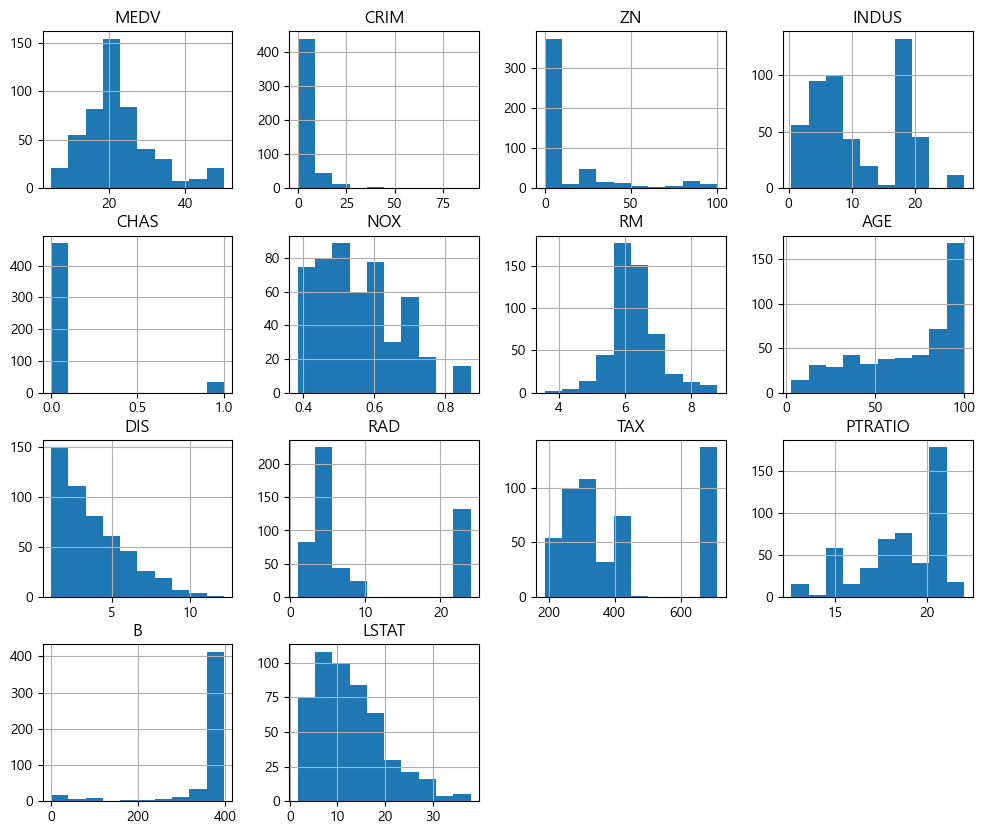

In [8]:
df_house.hist( figsize=(12, 10))

## 스케일링 수행

### Log Transform

In [9]:
df_house_log = np.log1p(df_house)

df_house_log

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.218876,0.006300,2.944439,1.196948,0.0,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421
1,3.117950,0.026944,0.000000,2.088153,0.0,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488
2,3.575151,0.026924,0.000000,2.088153,0.0,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420
3,3.538057,0.031857,0.000000,1.156881,0.0,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181
4,3.616309,0.066770,0.000000,1.156881,0.0,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.152736,0.060747,0.000000,2.559550,0.0,0.452985,2.027227,4.249923,1.246630,0.693147,5.613128,3.091042,5.973784,2.367436
502,3.072693,0.044275,0.000000,2.559550,0.0,0.452985,1.962908,4.352855,1.190127,0.693147,5.613128,3.091042,5.986201,2.310553
503,3.214868,0.058986,0.000000,2.559550,0.0,0.452985,2.076437,4.521789,1.152943,0.693147,5.613128,3.091042,5.986201,1.893112
504,3.135494,0.103991,0.000000,2.559550,0.0,0.452985,2.053354,4.503137,1.220505,0.693147,5.613128,3.091042,5.977492,2.012233


### Standard Scaled

In [10]:
df_scaled = StandardScaler().fit_transform(df_house_log.iloc[:,:])

df_scaled

array([[ 0.34517601, -0.78995997,  1.22932964, ..., -1.44553546,
         0.31108607, -1.2761181 ],
       [ 0.08410426, -0.7697552 , -0.58909073, ..., -0.23432428,
         0.31108607, -0.29549095],
       [ 1.26677575, -0.76977425, -0.58909073, ..., -0.23432428,
         0.29697693, -1.59738213],
       ...,
       [ 0.3348082 , -0.73839446, -0.58909073, ...,  1.09991488,
         0.31108607, -1.081705  ],
       [ 0.12948729, -0.69434626, -0.58909073, ...,  1.09991488,
         0.29913562, -0.86049628],
       [-1.36635394, -0.7507904 , -0.58909073, ...,  1.09991488,
         0.31108607, -0.54189116]])

In [14]:
df_scaled[:,0]

array([ 3.45176010e-01,  8.41042635e-02,  1.26677575e+00,  1.17082193e+00,
        1.37324206e+00,  7.90801366e-01,  2.28778348e-01,  6.47552805e-01,
       -5.77458649e-01, -2.45010441e-01, -8.09264344e-01, -2.45010441e-01,
        9.55248830e-02, -5.70270682e-02, -3.37641119e-01, -1.18182780e-01,
        2.50334857e-01, -4.33712441e-01, -8.13161303e-02, -3.37641119e-01,
       -1.04612726e+00, -1.55582459e-01, -7.77130191e-01, -8.91390801e-01,
       -7.14035206e-01, -9.93513252e-01, -5.62719201e-01, -8.41802712e-01,
       -3.10835013e-01,  1.45009761e-02, -1.21071205e+00, -8.91390801e-01,
       -1.11798649e+00, -1.13626760e+00, -1.06390579e+00, -2.45010441e-01,
       -1.05835424e-01,  1.45009761e-02,  4.16609988e-01,  9.67527272e-01,
        1.28122700e+00,  6.01110514e-01,  4.76307240e-01,  4.16609988e-01,
        3.79107839e-02, -1.93530809e-01, -1.05835424e-01, -5.62719201e-01,
       -9.08133682e-01, -1.80819402e-01, -1.43055722e-01, -4.49675307e-02,
        4.46630821e-01,  

In [15]:
# 스테일링된 값을 데이터프레임에 입력

for i in list(range(0,14,1)):
    df_house.iloc[:,i] = df_scaled[:, i]

df_house

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.345176,-0.789960,1.229330,-1.667618,-0.272599,-0.111204,0.453447,0.136758,0.357474,-1.812467,-0.609011,-1.445535,0.311086,-1.276118
1,0.084104,-0.769755,-0.589091,-0.322821,-0.272599,-0.741058,0.240390,0.456001,0.742438,-1.272635,-1.117107,-0.234324,0.311086,-0.295491
2,1.266776,-0.769774,-0.589091,-0.322821,-0.272599,-0.741058,1.256834,0.028245,0.742438,-1.272635,-1.117107,-0.234324,0.296977,-1.597382
3,1.170822,-0.764946,-0.589091,-1.728078,-0.272599,-0.844197,1.017096,-0.451842,1.150436,-0.889619,-1.334579,0.162604,0.303235,-2.050937
4,1.373242,-0.730775,-0.589091,-1.728078,-0.272599,-0.844197,1.208564,-0.171661,1.150436,-0.889619,-1.334579,0.162604,0.311086,-1.170492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.174088,-0.736671,-0.589091,0.388500,-0.272599,0.197566,0.478066,0.233912,-0.564233,-1.812467,-0.813100,1.099915,0.294047,-0.200880
502,-0.032964,-0.752792,-0.589091,0.388500,-0.272599,0.197566,-0.189116,0.408613,-0.701049,-1.812467,-0.813100,1.099915,0.311086,-0.306512
503,0.334808,-0.738394,-0.589091,0.388500,-0.272599,0.197566,0.988524,0.695334,-0.791089,-1.812467,-0.813100,1.099915,0.311086,-1.081705
504,0.129487,-0.694346,-0.589091,0.388500,-0.272599,0.197566,0.749086,0.663679,-0.627491,-1.812467,-0.813100,1.099915,0.299136,-0.860496


In [ ]:
df_house.hist( figsize=(12, 10))

In [ ]:
for i in list(range(0,13)):
    sb.distplot(df_house.iloc[:,i], kde=True)
    plt.show()

# 일반 선형 회귀분석

In [ ]:
x = df_house.iloc[:, 1:14]
x = add_constant(x)

y = df_house.iloc[:, 0]

model = OLS( y, x )

fit_model = model.fit()

print( fit_model.summary() )

### 다중공선성 확인

In [ ]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x.columns
VIF['VIF factor'] = [ variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]

VIF.round(3)

## 변수 선택

In [ ]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

lr = LinearRegression()

sffs = SFS( lr, k_features=12,
            forward=True, floating=True,
            scoring='neg_mean_squared_error',
            cv=4, n_jobs=-1)

sffs.fit(x,y)

fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

pd.DataFrame.from_dict(sffs.get_metric_dict()).T

## 선택된 변수들로 회귀분석

In [ ]:
x = df_house[['CRIM', 'CHAS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
x = add_constant(x)

y = df_house.iloc[:, 0]

model = OLS( y, x )

fit_model = model.fit()

print( fit_model.summary() )

### 다중공선성 확인

In [ ]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x.columns
VIF['VIF factor'] = [ variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]

VIF.round(3)

# Ridge 회귀

- `sklearn.linear_model.Ridge( alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 10)
fit_model = model.fit(x,y)

In [ ]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

In [ ]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

## RMSE 가 최소인 조건 탐색

In [ ]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 50, 100, 150, 200, 500]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = list(range(20, 50, 2))

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [ ]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 30)
fit_model = model.fit(x,y)

In [ ]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()


# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

In [ ]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [ ]:
x = df_house.iloc[:, 1:14].drop(['ZN', 'INDUS', 'AGE'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 30)
fit_model = model.fit(x,y)

In [ ]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()


# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

In [ ]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

### 다중공선성 확인

In [ ]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

# Lasso 회귀

- `sklearn.linear_model.Lasso( alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic' )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 10)
fit_model = model.fit(x,y)

In [ ]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

In [ ]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

## RMSE 가 최소인 조건 탐색

In [ ]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 0.02, 0.001)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Lasso(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [ ]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 0.005)
fit_model = model.fit(x,y)

In [ ]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

In [ ]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [ ]:
x = df_house.iloc[:, 1:14].drop(['ZN', 'INDUS', 'AGE'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 0.005)
fit_model = model.fit(x,y)

In [ ]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

In [ ]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

### 다중공선성 확인

In [ ]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

# Elastic Net 회귀

- `sklearn.linear_model.ElasticNet( alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic' )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [ ]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = ElasticNet(alpha = 1)
fit_model = model.fit(x,y)

In [ ]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

In [ ]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

## RMSE 가 최소인 조건 탐색

In [ ]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 0.1, 0.01)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = ElasticNet(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 0.02, 0.001)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = ElasticNet(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [ ]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = ElasticNet(alpha = 0.01)
fit_model = model.fit(x,y)

In [ ]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

In [ ]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [ ]:
x = df_house.iloc[:, 1:14].drop(['ZN', 'INDUS', 'AGE'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = ElasticNet(alpha = 0.01)
fit_model = model.fit(x,y)

In [ ]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

In [ ]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

### 다중공선성 확인

In [ ]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)